In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, utils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/공부/아이덱/수화/test_final.csv')
print(train_df.shape)

(1800, 785)


In [ ]:
train_images=train_df.values[0:,1:]
train_labels = train_df.values[0:,0]
train_labels = utils.to_categorical(train_labels)
print(train_images.shape, train_labels.shape)

(1800, 784) (1800, 15)


In [ ]:
print(train_images.shape,train_labels.shape)
#normalizing the dataset
train_images=train_images/255
train_images=train_images.reshape(1800,28,28,1)
print(train_images.shape,train_labels.shape)

(1800, 784) (1800, 15)
(1800, 28, 28, 1) (1800, 15)


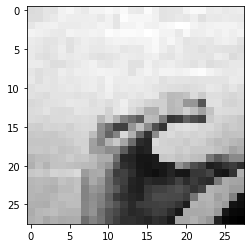

In [ ]:
n = 150
train_images_n = train_images[n]
plt.imshow(train_images_n.reshape(28,28), cmap='gray')

In [3]:
sign_mnist = models.Sequential()
sign_mnist.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
sign_mnist.add(layers.MaxPooling2D(2))
sign_mnist.add(layers.Conv2D(16, (5, 5), activation='relu'))
sign_mnist.add(layers.MaxPooling2D(2, 2))
sign_mnist.add(layers.Flatten())
sign_mnist.add(layers.Dense(64, activation='relu'))
sign_mnist.add(layers.Dense(32, activation='relu'))
sign_mnist.add(layers.Dense(25, activation='softmax'))
sign_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# sign_mnist = models.Sequential()
# sign_mnist.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
# sign_mnist.add(layers.MaxPooling2D(2))
# sign_mnist.add(layers.Conv2D(16, (5, 5), activation='relu'))
# sign_mnist.add(layers.MaxPooling2D(2, 2))
# sign_mnist.add(layers.Flatten())
# sign_mnist.add(layers.Dense(120, activation='relu'))
# sign_mnist.add(layers.Dense(84, activation='relu'))
# sign_mnist.add(layers.Dense(25, activation='softmax'))
# sign_mnist.summary()

In [ ]:
# sign_mnist = models.Sequential()
# sign_mnist.add(layers.Conv2D(6, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# sign_mnist.add(layers.Conv2D(6, (3, 3), activation='relu'))
# sign_mnist.add(layers.MaxPooling2D(2))
# sign_mnist.add(layers.Conv2D(16, (3, 3), activation='relu'))
# sign_mnist.add(layers.Conv2D(16, (3, 3), activation='relu'))
# sign_mnist.add(layers.MaxPooling2D(2, 2))
# sign_mnist.add(layers.Flatten())
# sign_mnist.add(layers.Dense(64, activation='relu'))
# sign_mnist.add(layers.Dense(32, activation='relu'))
# sign_mnist.add(layers.Dense(25, activation='softmax'))
# sign_mnist.summary()

In [ ]:
sign_mnist.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = sign_mnist.fit(train_images, train_labels, epochs=50)

# import matplotlib.pyplot as plt

# fig, loss_ax = plt.subplots()
# acc_ax = loss_ax.twinx()

# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.set_xlabel('epoch')
# loss_ax.set_ylabel('loss')
# loss_ax.legend(loc='upper left')

# acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.set_ylabel('accuracy')
# acc_ax.legend(loc='upper left')

# plt.show()


sign_mnist.save('/content/drive/MyDrive/공부/아이덱/수화/sign_mnist.h5')

Epoch 1/50
57/57 [==============================] - 1s 6ms/step - loss: 1.6366 - accuracy: 0.2711
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 1.3136 - accuracy: 0.3706
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 1.1675 - accuracy: 0.5133
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.9898 - accuracy: 0.6389
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.8023 - accuracy: 0.7156
Epoch 6/50
57/57 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.7878
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.5149 - accuracy: 0.8311
Epoch 8/50
57/57 [==============================] - 0s 7ms/step - loss: 0.4258 - accuracy: 0.8522
Epoch 9/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.8778
Epoch 10/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.8922
Epoch 11/50
57/57 [

In [ ]:
sign_mnist = models.load_model('sign_mnist.h5')

test_loss, test_acc = sign_mnist.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [ ]:
#16bit
np.set_printoptions(threshold = 1e6)
CNN_W = sign_mnist.get_weights()

flog = open("conv1.log", 'w')
    
for i in range(5):
    for j in range(5):
        for o in range(6):
            if (CNN_W[0][i][j][0][o]*32768).astype(int) < 0 :
                print("-", file = flog, end='')
            print("16'd%d, "%abs((CNN_W[0][i][j][0][o]*32768).astype(int)) , file = flog, end=' ')
        print("", file = flog)
    print("", file = flog)
        
print("==========================conv1_bias==========================", file = flog)       
print("", file = flog)   
for o in range(6):
    if (CNN_W[1][o]*32768*256).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[1][o]*32768*256).astype(int)), file = flog, end=' ')
        
flog.close()
    
####################################################    

flog = open("conv2.log", 'w') 
    
for row in range(5):
    for col in range(5):
        for o in range(16):
            for i in range(6):
                if (CNN_W[2][row][col][i][o]*32768).astype(int) < 0 :
                   print("-", file = flog, end='')
                print("16'd%d, "%abs((CNN_W[2][row][col][i][o]*32768).astype(int)) , file = flog, end=' ')
            print("", file = flog)
        print("", file = flog)
    print("", file = flog)
    
print("", file = flog)  
    
print("", file = flog)
print("", file = flog)   
print("==========================conv2_bias==========================", file = flog) 
for o in range(16):
    if (CNN_W[3][o]*32768*256).astype(int) < 0 :
         print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[3][o]*32768*256).astype(int)), file = flog, end=' ')
        
flog.close()

####################################################    

flog = open("fc1.log", 'w')
    
for o in range(64):
    for i in range(256):
        if (CNN_W[4][i][o]*32768).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[4][i][o]*32768).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog)
print("==========================bias_fc1==========================", file = flog)   
for o in range(64):
    if (CNN_W[5][o]*32768*256).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[5][o]*32768*256).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog) 

flog.close()

#################################################### 

flog = open("fc2.log", 'w')
    
for o in range(32):
    for i in range(64):
        if (CNN_W[6][i][o]*32768).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[6][i][o]*32768).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog) 
print("==========================bias_fc2==========================", file = flog)  
for o in range(32):
    if (CNN_W[7][o]*32768*256).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[7][o]*32768*256).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog)

flog.close()
#################################################### 

flog = open("fc3.log", 'w')

for o in range(25):
    for i in range(32):
        if (CNN_W[8][i][o]*32768).astype(int) < 0 :
            print("-", file = flog, end='')
        print("16'd%d, "%abs((CNN_W[8][i][o]*32768).astype(int)) , file = flog, end=' ')
        if i%16==15 :
            print("", file = flog) 
    print("", file = flog)
print("==========================bias_fc3==========================", file = flog) 
for o in range(25):
    if (CNN_W[9][o]*32768*256).astype(int) < 0 :
        print("-", file = flog, end='')
    print("24'd%d, "%abs((CNN_W[9][o]*32768*256).astype(int)) , file = flog, end=' ')
    if o%16==15 :
        print("", file = flog)  
print("", file = flog)

flog.close()